In [1]:
import json
import collections
import re
import nltk
from nltk.corpus import stopwords
import ipywidgets as widgets
from datetime import date, timedelta, datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


nltk.download('stopwords')

count = collections.Counter()
cachedStopWords = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
f = open('dataset.json')
dataset = json.load(f)

In [3]:
series = []
for i in dataset:
  series.append(i["series"])
print("Series are:", series)

Series are: ['ADM 50', 'ADM 51', 'ADM 52', 'ADM 53', 'ADM 54', 'ADM 55', 'ADM 101', 'MT 32', 'OS 1', 'OS 2', 'OS 3', 'OS 4', 'OS 5']


In [4]:
checkboxes = [widgets.Checkbox(value=False, description=label) for label in series]
output = widgets.VBox(children=checkboxes)
display(output)

In [5]:
selected_data = []
for i in range(0, len(checkboxes)):
    if checkboxes[i].value == True:
        selected_data = selected_data + [checkboxes[i].description]
print(selected_data)

['OS 3']


In [6]:
for j in dataset:
  if j["series"] in selected_data:
    print("Series: " + j["series"])

    description = ""
    for i in j["results"]:
      description_sentence = i["record"]["description"].lower()
      description_sentence = ' '.join([word for word in description_sentence.split() if word not in stopwords.words("english")])
      words = re.findall(r'\w+', description_sentence)
      print("Five most frequent words in the description of the record titled '" + i["record"]["title"] + "' are:")
      for i in collections.Counter(words).most_common(5):
        print(i[0] + " which appeared " + str(i[1]) + " times.")
      description = description + description_sentence
    print("Five most frequent words in the description of", j["series"], "series are:")
    for i in collections.Counter(re.findall(r'\w+', description)).most_common(5):
      print(i[0] + " which appeared " + str(i[1]) + " times.")

Series: OS 3
Five most frequent words in the description of the record titled 'Register of Marriages and Baptisms, 16 Survey Company Royal Engineers. All the entries below appear...' are:
16 which appeared 5 times.
survey which appeared 5 times.
company which appeared 5 times.
royal which appeared 5 times.
engineers which appeared 5 times.
Five most frequent words in the description of the record titled 'Register of Marriages and Baptisms, 16 Survey Company Royal Engineers. All the entries below appear...' are:
16 which appeared 4 times.
survey which appeared 4 times.
company which appeared 4 times.
royal which appeared 4 times.
engineers which appeared 4 times.
Five most frequent words in the description of the record titled 'Register of Marriages and Baptisms, 16 Survey Company Royal Engineers. All the entries below appear...' are:
16 which appeared 4 times.
survey which appeared 4 times.
company which appeared 4 times.
royal which appeared 4 times.
engineers which appeared 4 times.


In [7]:
global_max = ("", 0)
for i in dataset:
  print(i["series"])
  local_max = 0
  for j in i["results"]:
    length = collections.Counter(re.findall(r'\w+', j["record"]["description"].lower())).total()
    if length > local_max:
      local_max = length
    print("Length of the description for the record titled '" + j["record"]["title"] + "':", length)
  print("Max length of the description for this series:", local_max)
  if global_max[1] < local_max:
    global_max = (i["series"], local_max)
print("Lengthiest description is for the series:", global_max[0], "with length", global_max[1])

ADM 50
Length of the description for the record titled 'Sir T. Williams': 3
Length of the description for the record titled 'T. Brodrick': 2
Length of the description for the record titled 'Sir J. Wallace': 3
Length of the description for the record titled 'J. Colpoys': 2
Length of the description for the record titled 'Sir H. Harvey': 3
Length of the description for the record titled 'Sir J. B. Warren': 4
Length of the description for the record titled 'W. Waldegrave': 2
Length of the description for the record titled 'Captain C. F. Hotham, S.N.O. (July-Dec.)': 9
Length of the description for the record titled 'G. Murray': 2
Length of the description for the record titled 'Rear Admiral George L. Atkinson Willes': 6
Length of the description for the record titled 'Vice Admiral Sir Wm. N. W. Hewett, V.C., K.C.B., K.C.S.I., (VAC)': 17
Length of the description for the record titled 'Sir G. Walton': 3
Length of the description for the record titled 'Commodore J. E. C. Goodrich, M.V.O. Com

In [8]:
covering_dates = {}
for i in dataset:
  print(i["series"])
  if i["series"] != "OS 2":
    series_start_date = datetime.strptime("31/12/9999", "%d/%m/%Y")
    series_end_date = datetime.strptime("01/01/0001", "%d/%m/%Y")
    records = []
    for k, j in enumerate(i["results"]):
      if series_start_date > datetime.strptime(j["record"]["startDate"], "%d/%m/%Y"):
        series_start_date = datetime.strptime(j["record"]["startDate"], "%d/%m/%Y")
      if series_end_date < datetime.strptime(j["record"]["endDate"], "%d/%m/%Y"):
        series_end_date = datetime.strptime(j["record"]["endDate"], "%d/%m/%Y")
      records.append([k, datetime.strptime(j["record"]["startDate"], "%d/%m/%Y"), datetime.strptime(j["record"]["endDate"], "%d/%m/%Y")])
    print("Covering dates for this series:", records)
    covering_dates[i["series"]] = [series_start_date, series_end_date, records]
print("Covering dates:", covering_dates)

ADM 50
Covering dates for this series: [[0, datetime.datetime(1811, 4, 9, 0, 0), datetime.datetime(1811, 8, 30, 0, 0)], [1, datetime.datetime(1758, 4, 1, 0, 0), datetime.datetime(1760, 3, 22, 0, 0)], [2, datetime.datetime(1796, 9, 1, 0, 0), datetime.datetime(1796, 9, 29, 0, 0)], [3, datetime.datetime(1796, 10, 29, 0, 0), datetime.datetime(1796, 12, 31, 0, 0)], [4, datetime.datetime(1795, 8, 31, 0, 0), datetime.datetime(1796, 3, 30, 0, 0)], [5, datetime.datetime(1811, 1, 21, 0, 0), datetime.datetime(1811, 2, 22, 0, 0)], [6, datetime.datetime(1797, 4, 28, 0, 0), datetime.datetime(1797, 11, 23, 0, 0)], [7, datetime.datetime(1885, 1, 1, 0, 0), datetime.datetime(1885, 12, 31, 0, 0)], [8, datetime.datetime(1794, 4, 17, 0, 0), datetime.datetime(1796, 12, 30, 0, 0)], [9, datetime.datetime(1903, 1, 1, 0, 0), datetime.datetime(1903, 12, 31, 0, 0)], [10, datetime.datetime(1886, 1, 1, 0, 0), datetime.datetime(1887, 12, 31, 0, 0)], [11, datetime.datetime(1734, 3, 4, 0, 0), datetime.datetime(1735, 1

In [9]:
series_names = list(covering_dates.keys())
dates_list = [i for i in covering_dates.values()]
series_start_dates = [l[0].year for l in dates_list]
series_end_dates = [l[1].year for l in dates_list]
length = [(str(a)+" - "+str(b)) for a, b in zip([l[0].date() for l in dates_list], [l[1].date() for l in dates_list])]
print(series_names, length, series_start_dates, series_end_dates)

['ADM 50', 'ADM 51', 'ADM 52', 'ADM 53', 'ADM 54', 'ADM 55', 'ADM 101', 'MT 32', 'OS 1', 'OS 3', 'OS 4', 'OS 5'] ['1734-03-04 - 1903-12-31', '1695-01-01 - 1805-06-30', '1689-08-03 - 1809-12-08', '1925-08-04 - 1933-09-30', '1839-01-01 - 1861-06-30', '1778-04-27 - 1853-04-19', '1802-01-01 - 1874-12-31', '1858-01-01 - 1867-12-31', '1930-01-01 - 1971-12-31', '1907-01-01 - 1937-12-31', '1889-01-01 - 1930-12-31', '1777-01-01 - 1971-12-31'] [1734, 1695, 1689, 1925, 1839, 1778, 1802, 1858, 1930, 1907, 1889, 1777] [1903, 1805, 1809, 1933, 1861, 1853, 1874, 1867, 1971, 1937, 1930, 1971]


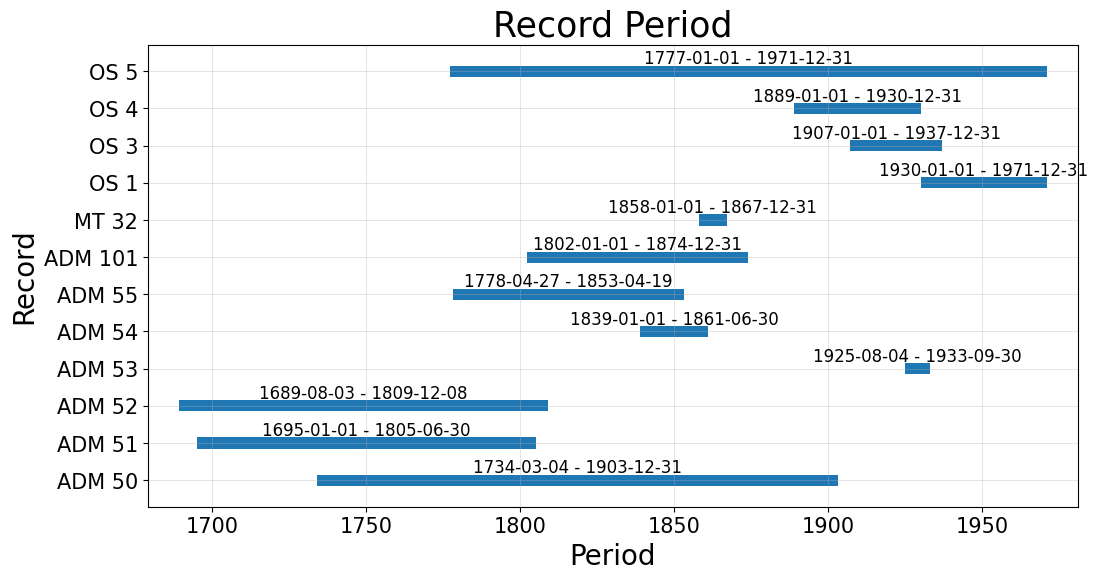

In [19]:
event = np.array(series_names)
begin = np.array(series_start_dates)
end = np.array(series_end_dates)
length = np.array(length)

plt.figure(figsize=(12,6))
plt.barh(range(len(begin)), (end-begin), .3, left=begin)
plt.yticks(range(len(begin)), event)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.title('Record Period', fontsize = '25')
plt.xlabel('Period', fontsize = '20')
plt.ylabel('Record', fontsize = '20')
plt.xlim(min(begin) - 10, max(end) + 10)
plt.grid(linewidth=.4, alpha=.6)
for i in range(len(begin)):
    plt.text(begin[i] + (end[i]-begin[i])/2, i+.2, length[i], ha='center', fontsize = '12')